# Weeks 7&8 Exercises

Author: Jordan,Andrew

Date: 07/30/2022

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import json
import requests
import ssl
import re

%pwd

'C:\\Users\\Andrew\\Documents\\Grad School\\DSC 540 - Data Preparation\\Assignments'

## Activity 9, page 294

In [18]:
#Check SSL Certificate
cert_check = ssl.create_default_context()
cert_check.check_hostname = False
cert_check.verify_mode = ssl.CERT_NONE

In [19]:
#Read html from url
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

In [20]:
#Write a small function to check the status of the web request
def check_status(r):
    if r.status_code==200:
        print('Connection Up')
        return 1
    else:
        print('Connection Down')
        return -1

In [21]:
#Check the status of response:
check_status(response)

Connection Up


1

In [22]:
#Decode the response and pass it on to BeautifulSoup for HTML Parsing
r_decoded = response.content.decode(response.encoding)
good_soup = BeautifulSoup(r_decoded,'html.parser')

In [23]:
#Find all the href tags and store them in the list of links. Check how the list looks like - print first 30 elements
list_o_links=[]

for link in good_soup.find_all('a'):
    list_o_links.append(link.get('href'))
list_o_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [24]:
#Use a regular expression to find the numeric digits in these links. These are the file numbers for hte top 100 eBooks.
#Initialize the empty list to hold the file numbers over an appropriate range 
#and use regex to find the numeric digits in the link href string. Use the findall method
num_digits=[]

for i in range(19,119):
    link=list_o_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        num_digits.append(int(n[0]))

In [25]:
#Print the file numbers
print(num_digits)

[1, 1, 7, 7, 30, 30, 1342, 11, 1661, 68771, 84, 58585, 2701, 174, 68769, 68765, 345, 98, 68768, 64317, 4300, 1232, 2591, 33283, 2600, 1400, 105, 1952, 2554, 35, 3176, 1184, 16328, 30254, 43, 5200, 6130, 25344, 1260, 2542, 68773, 514, 120, 74, 1080, 1497, 768, 219, 45, 76, 844, 16, 27827, 1399, 135, 46, 67098, 158, 5740, 4363, 55, 996, 28054, 68778, 205, 1727, 68772, 8492, 68767, 2680, 244, 68775, 2814, 3177, 68774, 161, 1998, 20228, 31284, 4980, 10, 215, 36, 766, 203, 236, 408, 3600, 730, 3825, 147, 12]


In [26]:
#What does the soup object's text look like? Use the .text method and print only the first 
# 2,000 characters (do not print the whole thing as it is too long). 
print(good_soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-08-17160587
last 7 days1033400
last 30 days4472931



Top 100 EBooks yesterd

In [27]:
#Search in the extracted text (using regular expression) from the soup object to find 
#the names of top 100 Ebooks (Yesterday's rank)
title_list=[]

In [28]:
#Create a starting index. It should point at the text "Top 100 Ebooks yesterday". 
#Hint: Use splitlines() method of the soup.text. It splits the lines of the text of the soup object.
starting_index=good_soup.text.splitlines().index('Top 100 EBooks yesterday')

In [29]:
#Loop 1-100 to add the strings of next 100 lines to this temporary list. Hint: splitlines() method
for i in range(100):
    title_list.append(good_soup.text.splitlines()[starting_index+2+i])

In [30]:
#Use a regular expression to extract only text from the name strings and append them to an empty list
list_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z]* ',title_list[i]).span()
    list_titles.append(title_list[i][id1:id2])

AttributeError: 'NoneType' object has no attribute 'span'

In [31]:
#Print list of titles
for L in list_titles:
    print(L)

Top 
Top 
Top 
Top 


## Connect to the Twitter API and do a simple data pull

In [32]:
import twitter

In [37]:
#assign api
api = twitter.Api(consumer_key='oquIbXRnMhxYLAQMijo0dJ5WP',
                 consumer_secret='IKDwmxOvOw4dghT9WnrnVbqmEUYjD93NFS5ViBIdsKkZDSKdTn',
                 access_token_key='1524527501107732481-yzB0h6VJCS9kwTTPeRH87SBPO4AVIJ',
                 access_token_secret='wYL9A6LIyKUwi4HBKFwOrYNt3FXOea2Dt1pAA9cFiLYYx')

In [39]:
api.VerifyCredentials()

User(ID=1524527501107732481, ScreenName=AJordan0211)

In [40]:
api.GetSearch(term='Bellevue University', since=2022-6-1, count=10)

[Status(ID=1560315278168399875, ScreenName=seattletimes, Created=Thu Aug 18 17:18:46 +0000 2022, Text='A University of Washington professor reported what officials believe is the first confirmed detection of the Atlas… https://t.co/YN6oPSuMmO'),
 Status(ID=1560099279158534144, ScreenName=KIRO7Seattle, Created=Thu Aug 18 03:00:28 +0000 2022, Text='A University of Washington professor initially reported a sighting of the atlas moth, which can have a wingspan of… https://t.co/dJaqqO6Sjr'),
 Status(ID=1560332441944047622, ScreenName=FroDiavolo, Created=Thu Aug 18 18:26:58 +0000 2022, Text='RT @seattletimes: A University of Washington professor reported what officials believe is the first confirmed detection of the Atlas moth i…'),
 Status(ID=1560329508200230912, ScreenName=jschickle, Created=Thu Aug 18 18:15:18 +0000 2022, Text='RT @seattletimes: A University of Washington professor reported what officials believe is the first confirmed detection of the Atlas moth i…'),
 Status(ID=15603261

In [41]:
api.GetSearch(term='Data Science', since=2022-8-1, count=10)

[Status(ID=1559797262678720514, ScreenName=MRobertsQLD, Created=Wed Aug 17 07:00:21 +0000 2022, Text='The "Science" (TM) behind the supposed climate crisis simply doesn\'t stack up. \n\nWhen you look underneath the "expe… https://t.co/s36X2YSuD2'),
 Status(ID=1559732116346310656, ScreenName=MartyMakary, Created=Wed Aug 17 02:41:29 +0000 2022, Text="Dr. Jha just said “it's going to be really important that people this fall and winter, get the new shot.”\n\nBut we’v… https://t.co/A7v87v86Uk"),
 Status(ID=1559970845736452098, ScreenName=AP, Created=Wed Aug 17 18:30:07 +0000 2022, Text='The Centers for Disease Control and Prevention director plans to shake up the organization with changes intended to… https://t.co/gKP9LGWTr9'),
 Status(ID=1560333700029526016, ScreenName=arXiv_Daily, Created=Thu Aug 18 18:31:58 +0000 2022, Text='RT @Deep__AI: From the Machine Learning &amp; Data Science glossary: Quantum Computation Theory https://t.co/ptxThtPo0H #Probability #QuantumCo…'),
 Status(ID=15603

## Using one of the datasets provided, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

### Density Plot

In [53]:
#Load data
crime = pd.read_csv("data/crimerates-by-state-2005.csv")

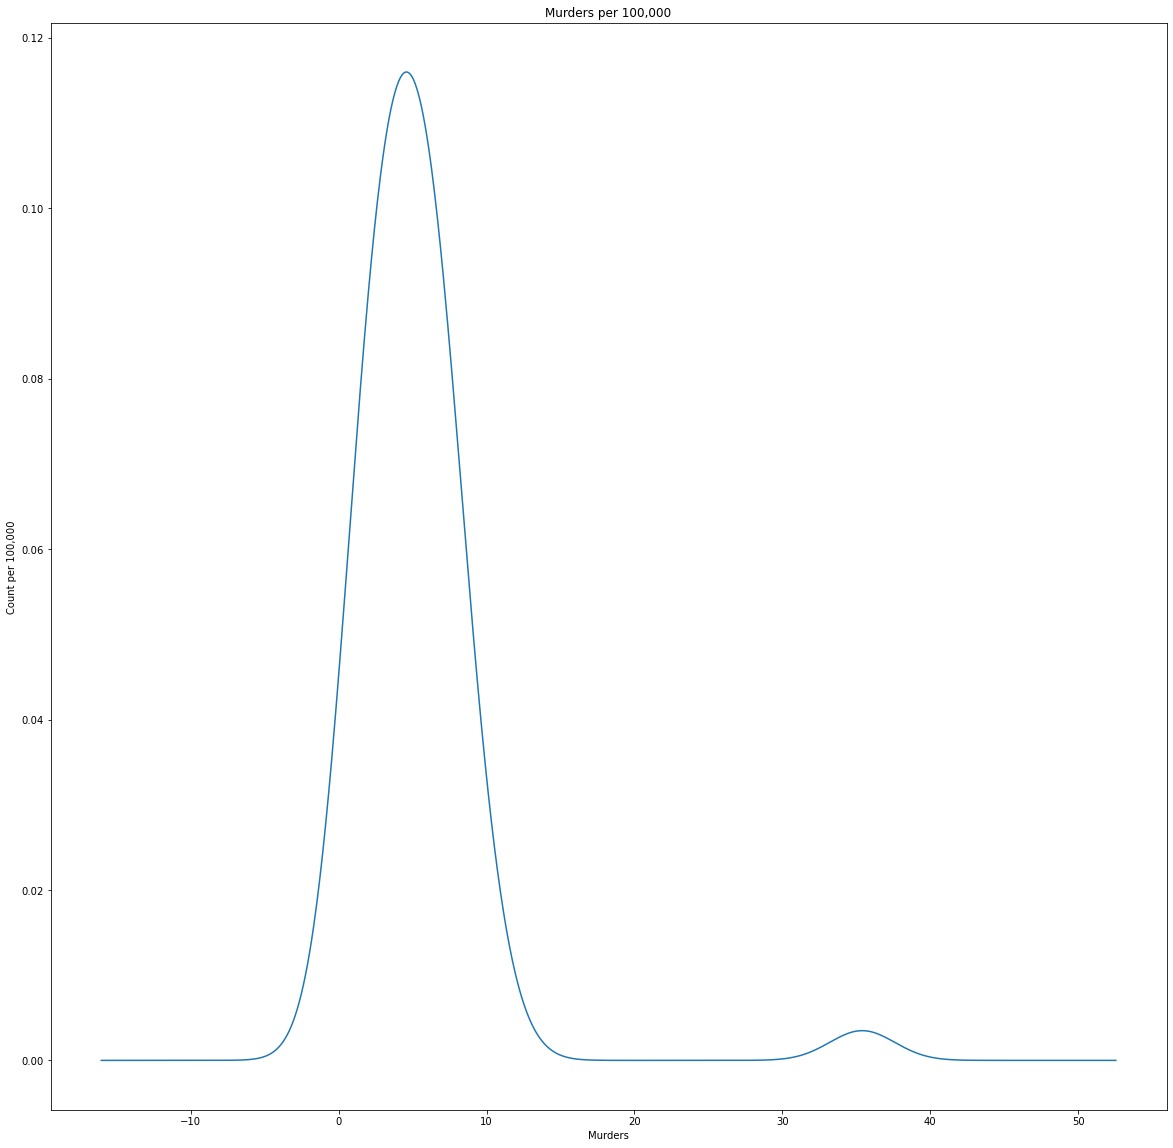

In [52]:
#Create density plot
plt.figure(figsize=(20,20))
crime['murder'].plot.kde()
plt.title('Murders per 100,000')
plt.xlabel('Murders')
plt.ylabel('Count per 100,000')
plt.show()

### Bar Chart

In [56]:
#Load data
obamaDF = pd.read_excel('data/obama-approval-ratings.xls')

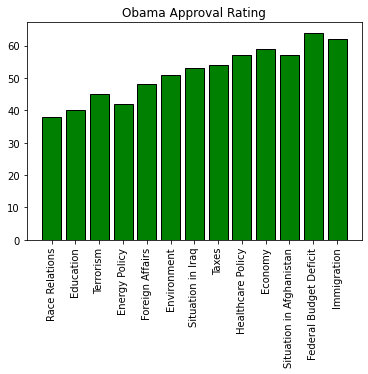

In [59]:
#Create bar chart
plt.bar(obamaDF.Issue, obamaDF.Disapprove, color='green', edgecolor='black')
plt.title('Obama Approval Rating')
plt.xticks(rotation=90)
plt.show()

### Histogram

In [60]:
#Load data 
crime = pd.read_csv('data/crimeratesbystate-formatted.csv')

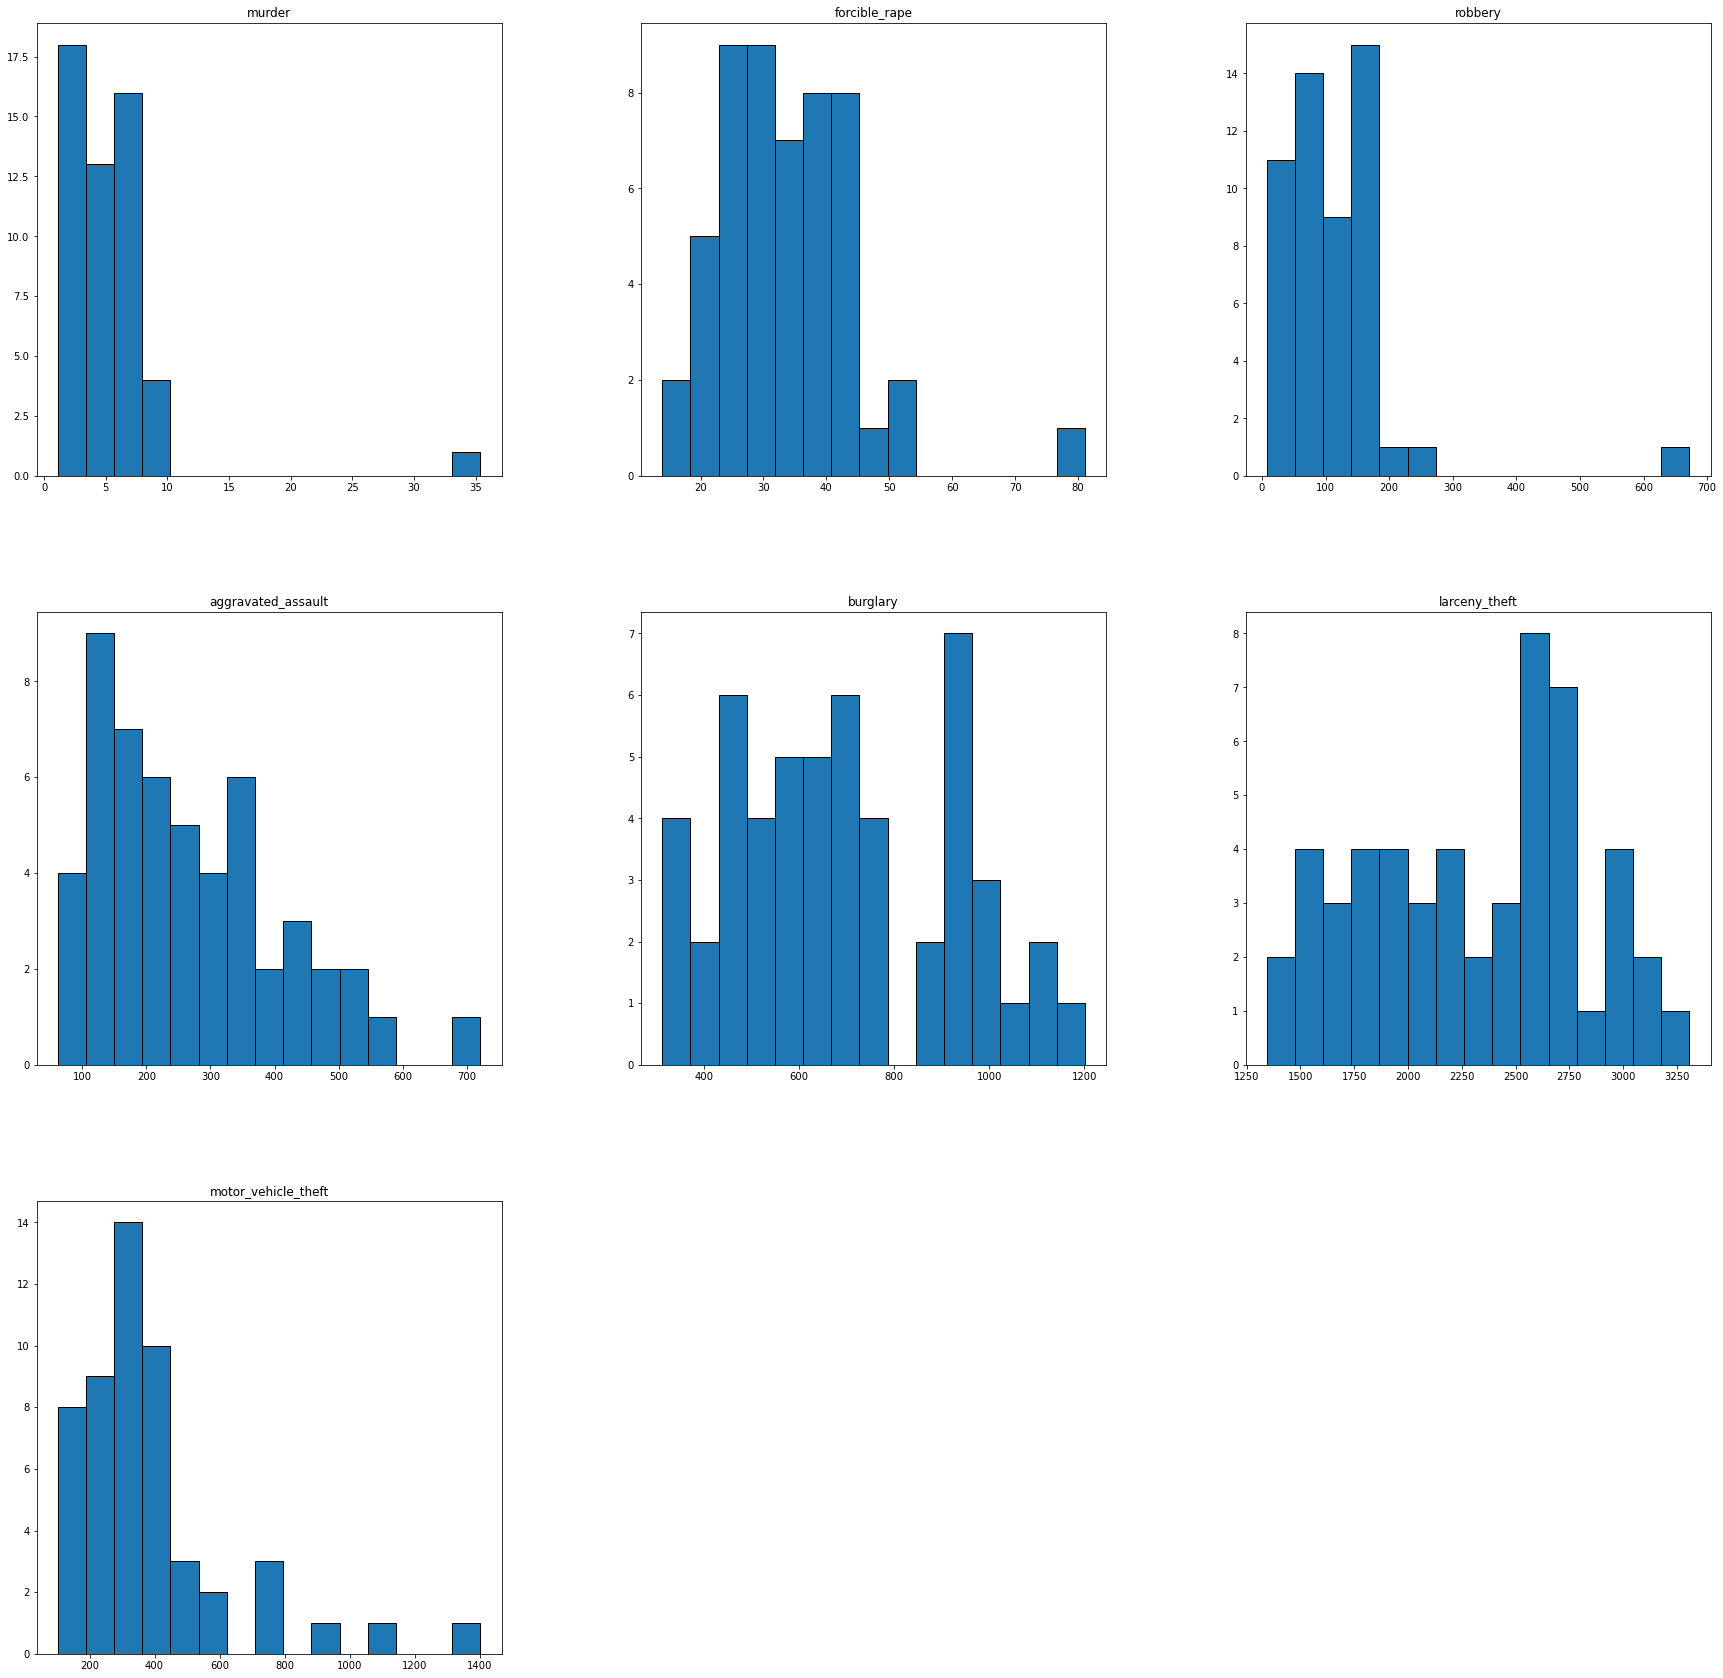

In [61]:
#Create histograms
crime.hist(bins = 15, edgecolor = "black", linewidth = 1.0, xlabelsize = 10, ylabelsize = 10, 
           grid = False, figsize = (30,30))
plt.show()